### Desafío Integrador
#### Análisis de las producciones del personal de Ciencia y Tecnología

### Etapa 4: Desarrollo de un modelo para determinar la cantidad de publicaciones en revistas de prestigio de las personas

#### 1. Lectura e interpretación de la tabla

In [162]:
#Se importa la funcionalidad necesaria
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,roc_curve,auc,roc_auc_score
from sklearn.metrics import precision_score, recall_score,accuracy_score
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score



In [163]:
#Lectura del archivo
df=pd.read_csv('personas_2012_2016.csv')
df_original=df
df.head()

,Unnamed: 0,persona_id,publico_articulos,cant_articulos_prestigio,publico_prestigio,produccion_cantidad_articulos_total,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,...,prod_2_años_ant,prod_3_años_ant,max_grado_academico,gran_area_experticia,tipo_personal,condicion_docente,ded_horaria_docente,clase_cargo_docente,categoria_conicet,rango_edad
0,2,7,1,7,1,8,0.0,0.0,0.0,0.0,...,2.0,0.0,Universitario de grado,CIENCIAS MÉDICAS Y DE LA SALUD,BECARIO DE I+D,no docente,0,no docente,No pertenece a Conicet,"(30, 40]"
1,3,9,1,8,1,8,0.0,0.0,0.0,0.0,...,9.0,2.0,Universitario de posgrado/doctorado,CIENCIAS MÉDICAS Y DE LA SALUD,INVESTIGADOR,no docente,0,no docente,No pertenece a Conicet,"(60, 70]"
2,4,10,1,7,1,8,0.0,0.0,0.0,0.0,...,1.0,2.0,Universitario de grado,CIENCIAS NATURALES Y EXACTAS,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Ayudante de primera,No pertenece a Conicet,"(50, 60]"
3,6,12,1,1,1,1,0.0,0.0,0.0,0.0,...,1.0,0.0,Universitario de posgrado/doctorado,INGENIERÍAS Y TECNOLOGÍAS,DOCENTE,Regular o por concurso,40 horas o más,Profesor asociado,No pertenece a Conicet,"(40, 50]"
4,7,13,1,0,0,1,0.0,0.0,0.0,0.0,...,0.0,0.0,Universitario de grado,CIENCIAS SOCIALES,DOCENTE,Regular o por concurso,De 0 hasta 19 horas,Ayudante de primera,No pertenece a Conicet,"(40, 50]"


In [164]:
df.drop(columns='Unnamed: 0',inplace=True)

In [165]:
df.shape

(56052, 38)

#### 2. Generación de dummies

In [166]:
#Se generan dummies para sexo 
df_dummies = pd.get_dummies(df['sexo'], prefix='sexo',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='sexo',inplace=True)

In [167]:
#Se generan dummies para rango_edad 
df_dummies = pd.get_dummies(df['rango_edad'], prefix='edad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='rango_edad',inplace=True)

In [168]:
#Se generan dummies para tipo_personal
df_dummies = pd.get_dummies(df['tipo_personal'], prefix='t_personal',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='tipo_personal',inplace=True)

In [169]:
#Se generan dummies para condicion_docente
df_dummies = pd.get_dummies(df['condicion_docente'], prefix='cond_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='condicion_docente',inplace=True)

In [170]:
#Se generan dummies para ded_horaria_docente
df_dummies = pd.get_dummies(df['ded_horaria_docente'], prefix='ded_horaria',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='ded_horaria_docente',inplace=True)

In [171]:
#Se generan dummies para max_grado_academico
df_dummies = pd.get_dummies(df['max_grado_academico'], prefix='grado_acad',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='max_grado_academico',inplace=True)

In [172]:
#Se generan dummies para categoria_conicet
df_dummies = pd.get_dummies(df['categoria_conicet'], prefix='cat_conicet',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='categoria_conicet',inplace=True)

In [173]:
#Se generan dummies para clase_cargo_docente
df_dummies = pd.get_dummies(df['clase_cargo_docente'], prefix='clase_cargo_docente',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='clase_cargo_docente',inplace=True)

In [174]:
#Se generan dummies para 'gran_area_experticia'
df_dummies = pd.get_dummies(df['gran_area_experticia'], prefix='area_exp',drop_first=True)
df=pd.concat([df,df_dummies], axis=1)
df.drop(columns='gran_area_experticia',inplace=True)

In [175]:
#df=df.loc[df['publico_prestigio']==1]

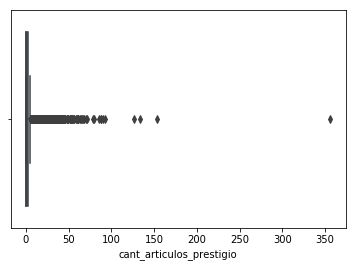

In [176]:
#Se hace un boxplot para visualizar outliers.
sns.boxplot(data=df,x='cant_articulos_prestigio')

In [177]:
#De definen como outliers aquellos valores que se encuentran por encima de (Q3 + 1.5 IQR) 

umbral_superior=df['cant_articulos_prestigio'].quantile(
    0.75)+1.5*(df['cant_articulos_prestigio'].quantile(0.75)-df[
    'cant_articulos_prestigio'].quantile(0.25))

In [178]:
umbral_superior

5.0

In [179]:
#Se encuentras 7017 outliers
df.loc[df['cant_articulos_prestigio']>=umbral_superior].shape

(7822, 131)

In [180]:
df.loc[df['cant_articulos_prestigio']>=50].shape

(36, 131)

In [181]:
#Se eliminan
#df=df.loc[df['cant_articulos_prestigio']<umbral_superior]

In [182]:
df=df.loc[df['cant_articulos_prestigio']<50]

In [183]:
#Se define la matriz target y la matriz de features
X=df.drop(columns=[ 'publico_articulos','cant_articulos_prestigio',
       'publico_prestigio','produccion_cantidad_articulos_total','persona_id'])

y =df['cant_articulos_prestigio']

In [184]:
# Hacemos el split entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [185]:
X_train.shape

(37530, 126)

In [186]:
X_train['prod_ultimo_año']=scaler.fit_transform(X_train[['prod_ultimo_año']])
X_train['prod_año_ant']=scaler.fit_transform(X_train[['prod_año_ant']])
X_train['prod_2_años_ant']=scaler.fit_transform(X_train[['prod_2_años_ant']])
X_train['prod_3_años_ant']=scaler.fit_transform(X_train[['prod_3_años_ant']])
X_train['produccion_cantidad_libros']=scaler.fit_transform(X_train[['produccion_cantidad_libros']])
X_train['produccion_patentes_otorgadas']=scaler.fit_transform(X_train[['produccion_patentes_otorgadas']])
X_train['produccion_patentes_solicitadas']=scaler.fit_transform(X_train[['produccion_patentes_solicitadas']])


X_test['prod_ultimo_año']=scaler.transform(X_test[['prod_ultimo_año']])
X_test['prod_año_ant']=scaler.transform(X_test[['prod_año_ant']])
X_test['prod_2_años_ant']=scaler.transform(X_test[['prod_2_años_ant']])
X_test['prod_3_años_ant']=scaler.transform(X_test[['prod_3_años_ant']])
X_test['produccion_cantidad_libros']=scaler.transform(X_test[['produccion_cantidad_libros']])
X_test['produccion_patentes_otorgadas']=scaler.transform(X_test[['produccion_patentes_otorgadas']])
X_test['produccion_patentes_solicitadas']=scaler.transform(X_test[['produccion_patentes_solicitadas']])


In [187]:
#importamos las librerías necesarias
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(39211, 126) (39211,)
(16805, 126) (16805,)


#### 2. Regresión lineal

In [189]:
# Seleccionamos alphas para ridge y lasso e instanciamos un Kfolds para la validación cruzada 
alphas_ridge = np.linspace(5, 20, 300)
alphas_lasso = np.linspace(0.001, 0.01, 300)
kf = KFold(n_splits=10, shuffle=True)

# Instanciamos los modelos
lm = LinearRegression(fit_intercept=False)
lm_ridge= RidgeCV(alphas=alphas_ridge, cv=kf, normalize=False)
lm_lasso = LassoCV(alphas=alphas_lasso, cv=kf, normalize=False)

In [190]:
# Hacemos los fits respectivos

lm.fit(X_train, y_train)
lm_ridge.fit(X_train, y_train)
lm_lasso.fit(X_train, y_train)

LassoCV(alphas=array([0.001  , 0.00103, ..., 0.00997, 0.01   ]), copy_X=True,
    cv=KFold(n_splits=10, random_state=None, shuffle=True), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [191]:
#Vemos los valores de alpha para cada modelo
print('Alpha Ridge cub:',lm_ridge.alpha_,'\n'
      'Alpha LASSO cub:',lm_lasso.alpha_,'\n')

Alpha Ridge cub: 9.364548494983278 
Alpha LASSO cub: 0.001 



In [192]:
# Calculamos el R2 para el train set

print(" Score Train Lineal: %.5f\n" % lm.score(X_train, y_train),
      "Score Train Ridge : %.5f\n" % lm_ridge.score(X_train, y_train),
      "Score Train Lasso : %.5f\n" %  lm_lasso.score(X_train, y_train))

 Score Train Lineal: 0.57056
 Score Train Ridge : 0.57044
 Score Train Lasso : 0.56981



In [193]:
# Hacemos las predicciones sobre la matriz de predictores del Train Set

y_pred_tr_lm = lm.predict(X_train)
y_pred_tr_ridge = lm_ridge.predict(X_train)
y_pred_tr_lasso = lm_lasso.predict(X_train)

# Calculamos el RMSE para el train set

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

print(" Train RMSE lineal   : %.5f \n" % rmse(y_train,y_pred_tr_lm),
      "Train RMSE Ridge    : %.5f \n" % rmse(y_train,y_pred_tr_ridge),
      "Train RMSE Lasso    : %.5f \n" % rmse(y_train,y_pred_tr_lasso))

 Train RMSE lineal   : 2.62591 
 Train RMSE Ridge    : 2.62626 
 Train RMSE Lasso    : 2.62820 



In [194]:
# Calculamos el R2 para el test set

print(" Score Test Lineal: %.5f\n" % lm.score(X_test, y_test),
      "Score Test Ridge : %.5f\n" % lm_ridge.score(X_test, y_test),
      "Score Test Lasso : %.5f\n" %  lm_lasso.score(X_test, y_test))

 Score Test Lineal: -700152946066.45361
 Score Test Ridge : 0.55925
 Score Test Lasso : 0.55897



In [195]:
# Hacemos las predicciones sobre la matriz de predictores del Test Set

y_pred_lm = lm.predict(X_test)
y_pred_ridge = lm_ridge.predict(X_test)
y_pred_lasso = lm_lasso.predict(X_test)


# Testeo final del modelo sobre Test Set

print(" Test RMSE lineal= %.2f\n" % rmse(y_test, y_pred_lm),
      "Test RMSE Ridge = %.2f\n" %  rmse(y_test, y_pred_ridge),
      "Test RMSE Lasso = %.2f\n" %  rmse(y_test, y_pred_lasso),
     )

 Test RMSE lineal= 3382101.47
 Test RMSE Ridge = 2.68
 Test RMSE Lasso = 2.68



#### 3. Árboles de decisión

In [196]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier, BaggingRegressor

In [197]:
def evaluar_rendimiento(modelo, nombre):
    s = cross_val_score(modelo, X_train, y_train, cv=5, n_jobs=-1)
    print("Rendimiento de {}:\t{:0.3} ± {:0.3}".format( \
        nombre, s.mean().round(3), s.std().round(3)))

In [198]:
dt = DecisionTreeRegressor()
bdt = BaggingRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()

evaluar_rendimiento(dt,  "Árbol de decisión")
evaluar_rendimiento(bdt, "Bagging AD")
evaluar_rendimiento(rf,  "Random Forest")
evaluar_rendimiento(et,  "Extra Trees")

Rendimiento de Árbol de decisión:	0.176 ± 0.049
Rendimiento de Bagging AD:	0.554 ± 0.011
Rendimiento de Random Forest:	0.559 ± 0.01
Rendimiento de Extra Trees:	0.532 ± 0.011


In [199]:
dt.fit(X_train,y_train)
bdt.fit(X_train,y_train)
rf.fit(X_train,y_train)
et.fit(X_train,y_train)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [200]:
dt_pred=dt.predict(X_test)
bdt_pred=bdt.predict(X_test)
rf_pred=rf.predict(X_test)
et_pred=et.predict(X_test)

In [201]:
print(" R dt: %.5f\n" % dt.score(X_test, y_test),
     "R2 bdt: %.5f\n" % bdt.score(X_test, y_test),
     "R2 rf: %.5f\n" % rf.score(X_test, y_test),
     "R2 et: %.5f\n" % et.score(X_test, y_test))

 R dt: 0.17363
 R2 bdt: 0.54611
 R2 rf: 0.55284
 R2 et: 0.51609



In [202]:
#Aplicamos GridSearch para el modelo de árboles que mejor nos dio
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 21], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [203]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
rf = RandomForestRegressor()
kf = StratifiedKFold(n_splits=3, shuffle=True)

In [204]:
grid_search_rf = GridSearchCV(rf, param_grid=param_trees, cv=kf, verbose=1, n_jobs=3)

In [205]:
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   14.0s
[Parallel(n_jobs=3)]: Done 194 tasks      | elapsed:  1.8min
[Parallel(n_jobs=3)]: Done 444 tasks      | elapsed:  8.2min
[Parallel(n_jobs=3)]: Done 794 tasks      | elapsed: 18.0min
[Parallel(n_jobs=3)]: Done 1125 out of 1125 | elapsed: 29.0min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=3,
       param_grid={'n_estimators': [50, 100, 200], 'max_features': [1, 5, 8, 10, 21], 'max_depth': [5, 20, 50, 70, 100], 'min_samples_leaf': [1, 5, 8, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [206]:
modelo_rf_gridsearch=grid_search_rf

In [207]:
y_pred_rf=modelo_rf_gridsearch.predict(X_test)

In [208]:
print(" RMSE RF = %.2f\n" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))    
print ("R2 RF:", modelo_rf_gridsearch.score(X_test,y_test))

 RMSE RF = 2.55

R2 RF: 0.6021276311054224


#### 4. XGBoost

In [209]:
from xgboost.sklearn import XGBRegressor
import scipy.stats as st

In [210]:
xgb = XGBRegressor()

In [211]:
one_to_left = st.beta(10, 1)

In [212]:
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [213]:
xgb_rs = RandomizedSearchCV(xgb,params, n_iter=25, verbose= True)

In [214]:
X_test_xgb=X_test.rename(columns={"edad_(20, 30]": "edad_20_30",
                       "edad_(30, 40]": "edad_30_40",
                       "edad_(40, 50]": "edad_40_50",
                       "edad_(50, 60]": "edad_50_60",
                       "edad_(60, 70]": "edad_60_70",
                       "edad_(70, 80]": "edad_70_80",
                       "edad_(80, 90]": "edad_80_90"})

In [215]:
X_train_xgb=X_train.rename(columns={"edad_(20, 30]": "edad_20_30",
                       "edad_(30, 40]": "edad_30_40",
                       "edad_(40, 50]": "edad_40_50",
                       "edad_(50, 60]": "edad_50_60",
                       "edad_(60, 70]": "edad_60_70",
                       "edad_(70, 80]": "edad_70_80",
                       "edad_(80, 90]": "edad_80_90"})  

In [216]:
xgb_rs.fit(X_train_xgb,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[22:57:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:20] WARNING: /workspace/src/objective/regre

[23:02:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:02:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:03:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  5.6min finished


[23:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid=True, n_iter=25, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f762c9f5748>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f762c9f5cc0>, 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f762ca4bc50>, 'colsample_bytree...a4ba90>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f762c95c400>},
          p

In [217]:
opt_xgb = xgb_rs.best_estimator_

In [218]:
y_pred_xgb = opt_xgb.predict(X_test_xgb)

In [219]:
from sklearn.metrics import mean_squared_error, r2_score

In [220]:
print(" Test RMSE = %.2f\n" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))    
print ("Test R2:", opt_xgb.score(X_test_xgb,y_test))

 Test RMSE = 2.55

Test R2: 0.6026310393478751


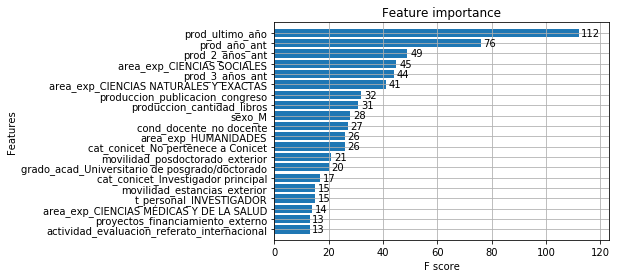

In [221]:
from xgboost import plot_importance
plot_importance(opt_xgb, height = 0.8,max_num_features=20)

In [222]:
print(opt_xgb.feature_importances_)

[1.5200960e-03 8.3447360e-03 1.1841780e-02 3.8163911e-03 0.0000000e+00
 1.1887458e-03 2.6082622e-02 2.3843152e-03 0.0000000e+00 5.5598137e-03
 0.0000000e+00 1.4978541e-01 3.8081829e-03 2.7154580e-02 4.3019596e-03
 0.0000000e+00 2.4839848e-02 2.2591760e-03 1.7883649e-02 8.8672703e-03
 6.2728964e-02 3.4376711e-02 1.5711511e-02 5.9125647e-03 1.2991100e-02
 2.4482328e-03 3.2915641e-03 4.6209479e-03 2.8179097e-03 5.5805733e-03
 0.0000000e+00 0.0000000e+00 3.0691531e-03 5.6461920e-03 1.0478725e-02
 2.7884328e-04 2.2258698e-03 1.9882401e-02 4.8765461e-03 1.1738427e-03
 1.9463784e-03 1.8665396e-03 0.0000000e+00 1.7603227e-03 2.9057917e-01
 1.4961986e-03 1.9174302e-04 1.0951679e-03 0.0000000e+00 3.3312412e-03
 7.1648788e-04 9.2953322e-03 3.8097832e-02 5.1190779e-03 5.7596896e-02
 0.0000000e+00 0.0000000e+00 1.9536575e-03 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.000

#### 5. Light GBM

In [223]:
import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

In [224]:
modelo_LGBM_prestigio = lgb.LGBMRegressor()

In [225]:
lgbm_cant_prestigio = RandomizedSearchCV(modelo_LGBM_prestigio, params, n_iter = 25, verbose= True)

In [226]:
import time
start = time.time()
lgbm_cant_prestigio.fit(X_train, y_train)
end = time.time()
print("La búsqueda con LightGBM llevó: ", end - start, " segundos")

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   30.0s finished


La búsqueda con LightGBM llevó:  30.3634352684021  segundos


In [227]:
print('Best parameters found by grid search are:', lgbm_cant_prestigio.best_params_)

Best parameters found by grid search are: {'colsample_bytree': 0.9609237356804633, 'gamma': 5.229114899206623, 'learning_rate': 0.21560714010851423, 'max_depth': 6, 'min_child_weight': 1.867469254393216, 'n_estimators': 27, 'reg_alpha': 3.705158935431509, 'subsample': 0.9573112414502136}


In [228]:
opt_lgbm_prestigio = lgbm_cant_prestigio.best_estimator_

In [229]:
y_pred_lgbm_prestigio = opt_lgbm_prestigio.predict(X_test)

In [230]:
print(" Test RMSE = %.2f\n" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_lgbm_prestigio)))    
print ("Test R2:", opt_lgbm_prestigio.score(X_test,y_test))

 Test RMSE = 2.55

Test R2: 0.6013901241989464


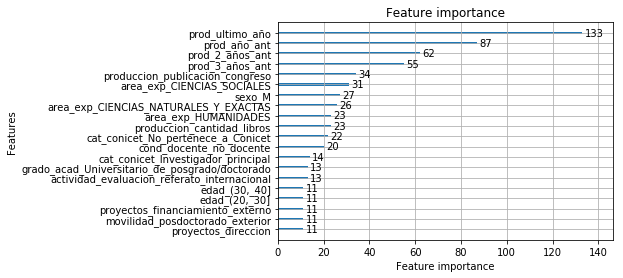

In [231]:
lgb.plot_importance(opt_lgbm_prestigio, max_num_features=20)

#### 7. Estimación de las publicaciones en revistas de prestigio para 2021

In [232]:
#Se trabaja con el modelo que mejor dio: LightGBM

In [233]:
#Lectura de la base 2017
df_2017=pd.read_csv('personas_2017_para_estimar.csv')
df_2017.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [234]:
df_2017_original=pd.read_csv('personas_2017_para_estimar.csv')
df_2017_original.head()

,Unnamed: 0,persona_id,movilidad_posgrado_exterior,movilidad_estancias_exterior,produccion_cantidad_libros,produccion_patentes_solicitadas,produccion_patentes_otorgadas,actividad_evaluacion_rrhh_becarios,actividad_evaluacion_rrhh_investigadores,actividad_evaluacion_rrhh_premios,...,clase_cargo_docente_Profesor por convenio,clase_cargo_docente_Profesor titular,clase_cargo_docente_Profesor titular plenario,clase_cargo_docente_Profesor visitante,clase_cargo_docente_no docente,area_exp_CIENCIAS MÉDICAS Y DE LA SALUD,area_exp_CIENCIAS NATURALES Y EXACTAS,area_exp_CIENCIAS SOCIALES,area_exp_HUMANIDADES,area_exp_INGENIERÍAS Y TECNOLOGÍAS
0,1,5,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,2,7,0,1,-0.318333,-0.100623,-0.042729,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,9,0,0,-0.318333,-0.100623,-0.042729,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3,4,10,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,11,0,0,-0.318333,-0.100623,-0.042729,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [235]:
#Se eliminan columnas que no se usarán
df_2017.drop(columns=['Unnamed: 0','persona_id'],inplace=True)

In [236]:
df_2017.shape

(62553, 122)

In [237]:
X_train.shape

(39211, 126)

In [238]:
columns_2017=df_2017.columns

In [239]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index(['cat_conicet_Gestión CyT', 'cat_conicet_Investigador correspondiente',
       'cat_conicet_Pasante', 'clase_cargo_docente_Docente auxiliar alumno',
       'clase_cargo_docente_Docente técnico profesional',
       'clase_cargo_docente_Profesor asistente',
       'clase_cargo_docente_Profesor ayudante A',
       'clase_cargo_docente_Profesor de extensión',
       'clase_cargo_docente_Profesor nivel A',
       'clase_cargo_docente_Profesor nivel B', 'edad_(10, 20]',
       'edad_(90, 100]'],
      dtype='object')

In [240]:
df_2017['cat_conicet_Gestión CyT']=0
df_2017['clase_cargo_docente_Docente auxiliar alumno']=0
df_2017['clase_cargo_docente_Docente técnico profesional']=0
df_2017['clase_cargo_docente_Profesor asistente']=0
df_2017['clase_cargo_docente_Profesor de extensión']=0
df_2017['clase_cargo_docente_Profesor nivel A']=0
df_2017.drop(columns=['edad_(10, 20]'],inplace=True)
df_2017.drop(columns=['edad_(90, 100]'],inplace=True)

In [241]:
df_2017.drop(columns=['cat_conicet_Investigador correspondiente'],inplace=True)
df_2017.drop(columns=['clase_cargo_docente_Profesor nivel B'],inplace=True)
df_2017['clase_cargo_docente_Profesor ayudante A']=0

In [242]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index(['cat_conicet_Pasante'], dtype='object')

In [243]:
df_2017['cat_conicet_Pasante']=0

In [244]:
#Analizamos las columnas que no se encuentran en una u otra matriz
df_2017.columns ^ X_train.columns

Index([], dtype='object')

In [245]:
#ponemos las columnas en el mismo orden
columnsTitles = X_train.columns
df_2017=df_2017.reindex(columns=columnsTitles)

In [246]:
y_pred_2017=lgbm_cant_prestigio.predict(df_2017)

In [247]:
cant_prestigio=pd.DataFrame(y_pred_2017)

In [248]:
cant_prestigio.rename(columns={0:'cant_prestigio'}, inplace=True)

In [249]:
df_2017=pd.concat([df_2017,cant_prestigio], axis=1)

In [250]:
df_2017['cant_prestigio'].sum()

77402.12874972424

In [251]:
df_2017_cant_prestigio=pd.concat([df_2017_original['persona_id'],
                                    df_2017['cant_prestigio']], axis=1)

In [252]:
df_2017_cant_prestigio.to_csv('df_2017_cant_prestigio.csv')